In [51]:
from __future__ import division
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io as io
import pickle

import scipy.stats


if os.path.exists('/Volumes/hoycw_clust/PRJ_Error_eeg/'):
    print('yes!')
    prj_dir='/Volumes/hoycw_clust/PRJ_Error_eeg/'
else:
    prj_dir = '/Users/sheilasteiner/Desktop/Knight_Lab/PRJ_Error_eeg/'

results_dir = prj_dir+'results/'
fig_type = '.png'
data_dir = prj_dir+'data/'
missed_trials_all = [];
SBJs = []
SBJ_id = 'goodEEG'
SBJ_file= open(prj_dir+'scripts/SBJ_lists/'+SBJ_id+'.sbj')
for line in SBJ_file:
    SBJs.append(line.split()[0])
print(SBJs)

['EEG01', 'EEG03', 'EEG05', 'EEG06', 'EEG08', 'EEG10', 'EEG12', 'EEG13', 'EEG14', 'EEG15', 'EEG16', 'EEG17', 'EEG18', 'EEG19', 'EEG20', 'EEG21', 'EEG22', 'EEG23', 'EEG24', 'EEG26', 'EEG27', 'EEG28', 'EEG29', 'EEG30']


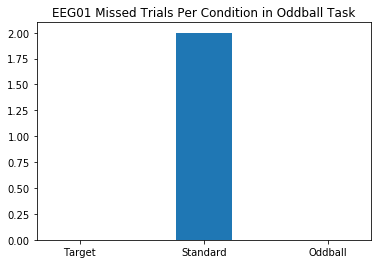

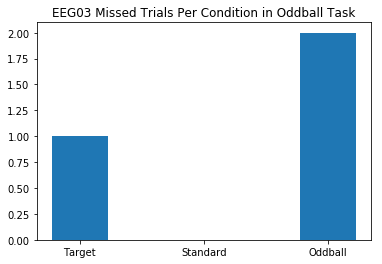

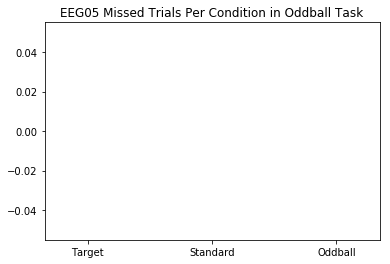

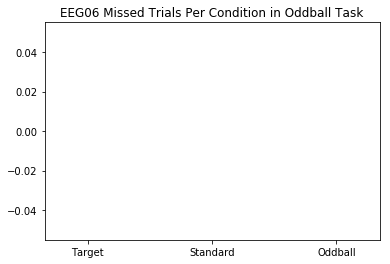

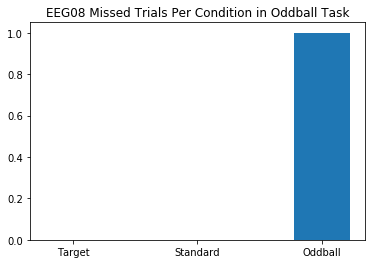

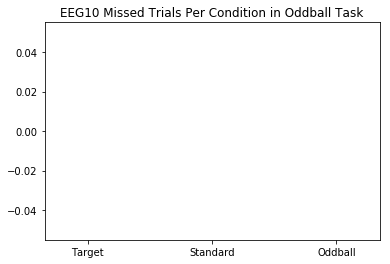

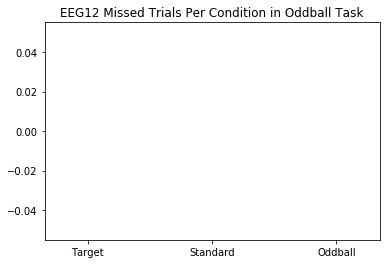

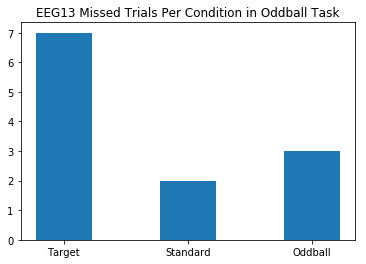

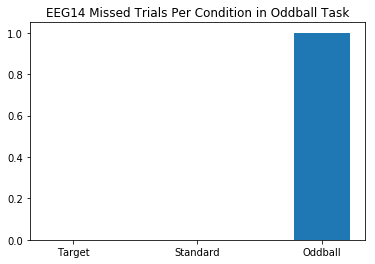

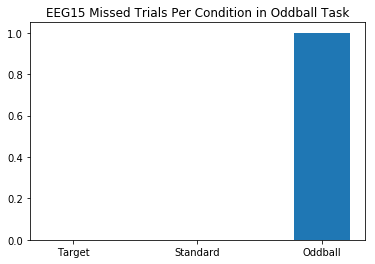

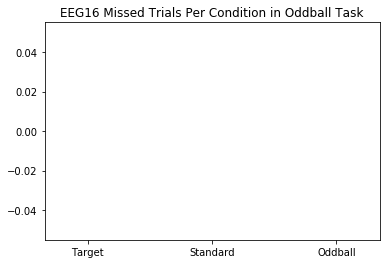

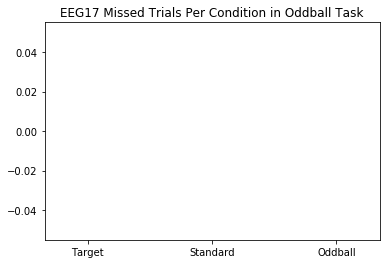

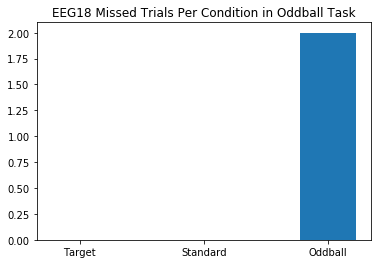

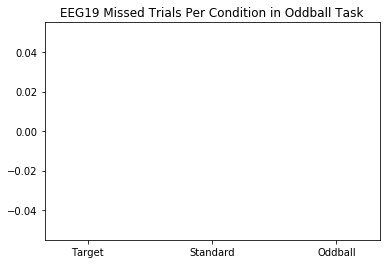

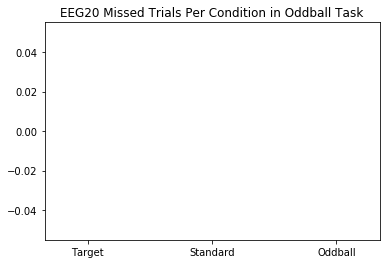

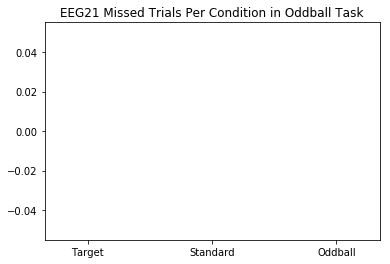

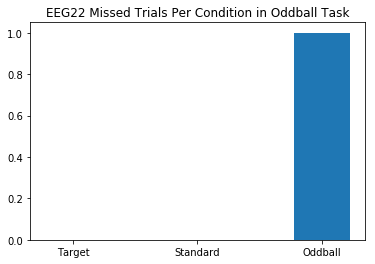

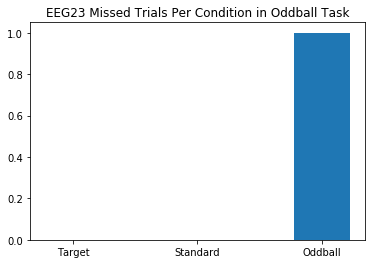

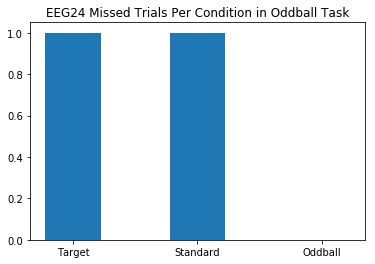

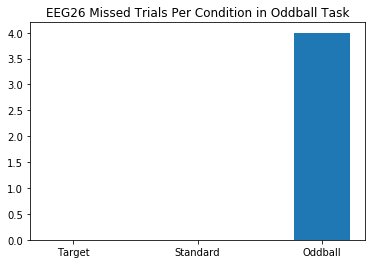

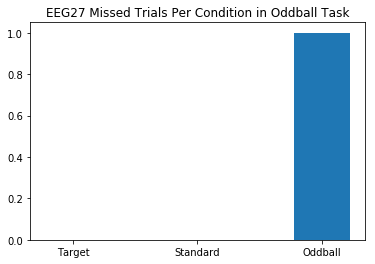

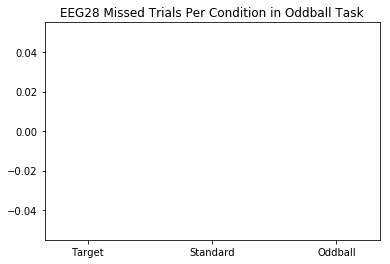

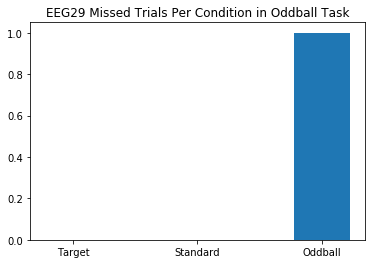

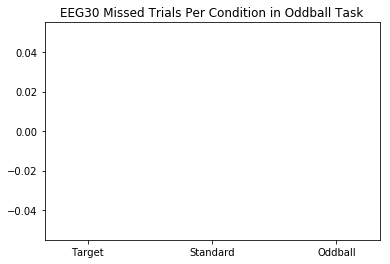

In [78]:
SBJ_idx = 0
# Compute accuracy per condition
accurate_ratio = np.zeros((len(SBJs),3))
for SBJ in SBJs:
    sbj_dir  = data_dir+SBJ+'/'

    # ### Load paradigm parameters
    prdm_fname = os.path.join(sbj_dir,'03_events',SBJ+'_odd_prdm_vars.pkl')
    with open(prdm_fname, 'rb') as f:
        prdm = pickle.load(f)

    #Load Behavior
    behav_fname = os.path.join(sbj_dir,'03_events',SBJ+'_behav_oddball.csv')
    data = pd.read_csv(behav_fname)
    
    # Exclude: Training/Examples, first trial of each block
    data = data[(data['Block']!=-1) & (data['ITI']>0)]
    
    #Initialize Variables
    condition_labels = ['tar', 'std', 'odd']
    missed_trials = []

    for cond_ix in range(len(condition_labels)):
        missed_trials.append(0)
        cond_trials = data[data['Condition'] == condition_labels[cond_ix]].index # find all the trials of a given condition
        for x in cond_trials:
            if condition_labels[cond_ix] == 'tar':
                if data.loc[x,'Hit'] == 0: # if got it right (Hit), increase tally
                    missed_trials[cond_ix] +=1
            else:
                if data.loc[x,'Miss'] == 1: # count 1 - number of misses/total as measure of accuracy
                    missed_trials[cond_ix] +=1
        accurate_ratio[SBJ_idx, cond_ix] = (np.size(cond_trials) - missed_trials[cond_ix])/np.size(cond_trials)
    width = 0.45
    condition_titles = ['Target', 'Standard', 'Oddball']
    plt.figure()
    plt.bar(np.arange(3), missed_trials, width, tick_label=condition_titles)
    plt.title(SBJ + ' Missed Trials Per Condition in Oddball Task') # can also get the figure from plt.gcf()
    if os.path.isdir(results_dir + 'BHV/ODD/accuracy/') == False:
        os.makedirs(results_dir + 'BHV/ODD/accuracy/')
    plt.savefig(results_dir+'BHV/ODD/accuracy/'+SBJ+'_missed_trials_condition'+fig_type)
    SBJ = SBJ_file.readline()
    SBJ_idx +=1

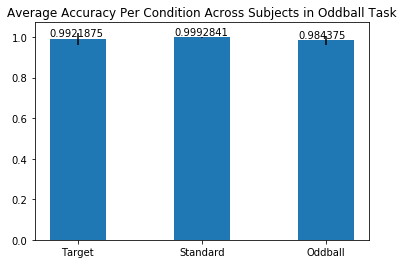

In [96]:
average_grp = np.average(accurate_ratio, 0)
std_grp = np.std(accurate_ratio,0)
condition_titles = ['Target', 'Standard', 'Oddball']
bars = plt.bar(np.arange(3), average_grp, width, tick_label=condition_titles)
plt.errorbar(np.arange(3), average_grp, yerr=std_grp, xerr=None, fmt = 'None', ecolor = [0, 0, 0]) 
for bar in bars:
    yval = np.round(bar.get_height(),7)
    plt.text(bar.get_x(), yval + .01, yval)

plt.title('Average Accuracy Per Condition Across Subjects in Oddball Task') # can also get the figure from plt.gcf()
if os.path.isdir(results_dir + 'BHV/ODD/accuracy/') == False:
    os.makedirs(results_dir + 'BHV/ODD/accuracy/')
plt.savefig(results_dir+'BHV/ODD/accuracy/GRP_Accuracy_condition'+fig_type)